# Assignment 5-b
## Loan Pham and Brandan Owens

In [1]:
#q.1 Load dataset "tips.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("../dataFiles/tips.csv")
df.head(5)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [2]:
#q.1.a Create a dataframe, party_count, by counting the party size for each day of a week.
party_count = df.groupby('day')['size'].value_counts().reset_index(name="count")
party_count

,day,size,count
0,Fri,2,16
1,Fri,1,1
2,Fri,3,1
3,Fri,4,1
4,Sat,2,53
5,Sat,3,18
6,Sat,4,13
7,Sat,1,2
8,Sat,5,1
9,Sun,2,39


In [3]:
#q.1.b Since there are not many parties with 1 person or 6 people, drop the party sizes of 1 and 6 from party_count.
party_count = party_count[(party_count['size'] > 1 ) & (party_count['size'] < 6)]
party_count

,day,size,count
0,Fri,2,16
2,Fri,3,1
3,Fri,4,1
4,Sat,2,53
5,Sat,3,18
6,Sat,4,13
8,Sat,5,1
9,Sun,2,39
10,Sun,4,18
11,Sun,3,15


<AxesSubplot:xlabel='day', ylabel='counts'>

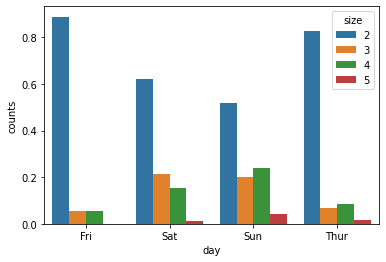

In [4]:
#q.1.c Normalize it so that the percentages of party size sum to 1 for each day. Then create a bar plot.
temp = party_count.groupby(['day', 'size']).agg({'count': 'sum'})
ct_pct = temp.groupby(level = 0).apply(lambda x: x / float(x.sum()))
new_df=ct_pct.groupby(['day', 'size'])['count'].sum().reset_index(name = 'counts')
sns.barplot(x = 'day', y = 'counts', data = new_df, hue = 'size')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

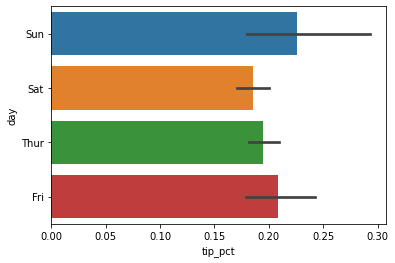

In [5]:
#q.1.d From the original dataframe, create a column of tipping percentage which is given by the following formula: tip_pct = tip / (total bill – tip). Create a bar plot of the tipping percentage by day.
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])
sns.barplot(x = 'tip_pct', y = 'day', data = df)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

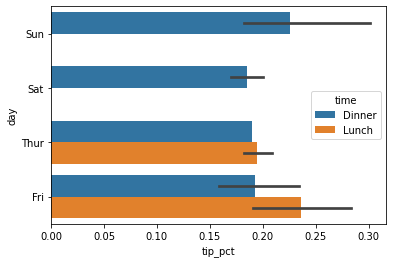

In [6]:
#q.1.e Create a bar plot of the tipping percentage by day and lunch/dinner.
sns.barplot(data = df, x = 'tip_pct', y = 'day', hue = 'time')

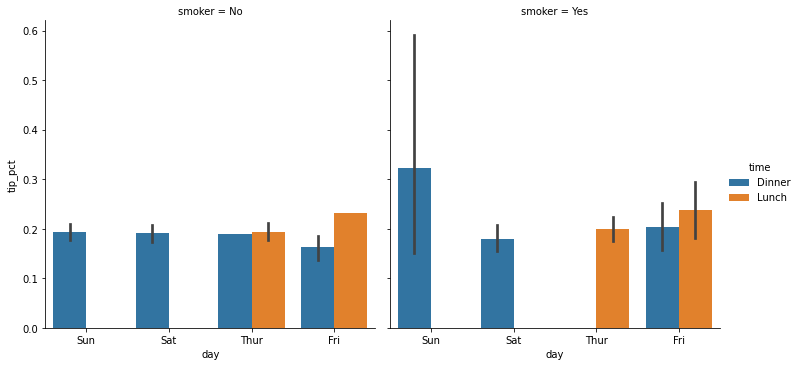

In [7]:
#q.1.f Plot the tipping percentage by day and lunch/dinner with seaborn for non-smokers. On the same figure, plot the tipping percentage by day and lunch/dinner for smokers.
sns.catplot(data = df, kind = 'bar', x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker')

C:\Users\jeric\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jeric\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


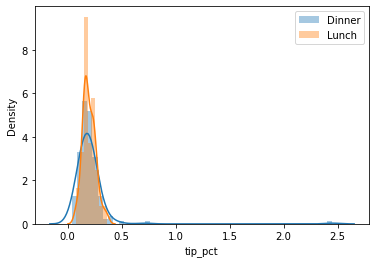

In [8]:
#q.1.g Create a density plot for tipping percentage for lunch. Create a density plot for tipping percentage for dinner on the same figure.
sns.distplot(df['tip_pct'][df['time'] == 'Dinner'], label = 'Dinner', kde = True)
sns.distplot(df['tip_pct'][df['time'] == 'Lunch'], label = 'Lunch', kde = True)
plt.legend()

In [9]:
#q.2 Load the dataset 'diamonds.csv'
df = pd.read_csv("../dataFiles/diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


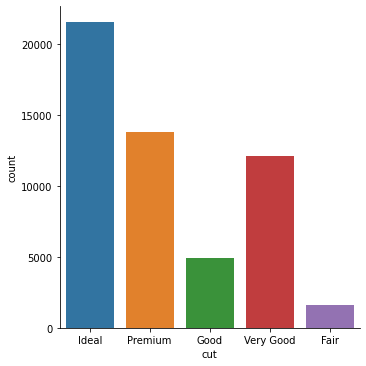

In [10]:
#q.2.a Create a bar plot of different cuts.
sns.catplot(x = 'cut', kind = 'count', data = df)

<AxesSubplot:xlabel='cut'>

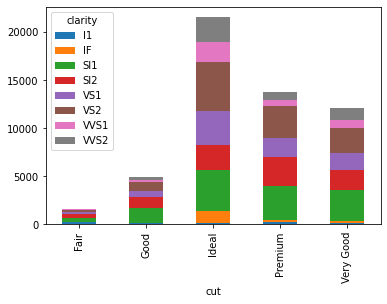

In [11]:
#q.2.b Create a stacked bar plot of cuts vs. clarity.
g = df.groupby('cut')['clarity'].value_counts().unstack()
g.plot.bar(stacked = True)

<AxesSubplot:xlabel='carat', ylabel='Count'>

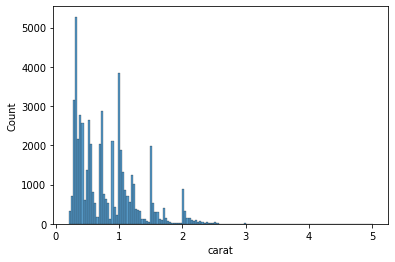

In [12]:
#q.2.c Plot a histogram using 'carat'.
sns.histplot(data = df, x = 'carat')

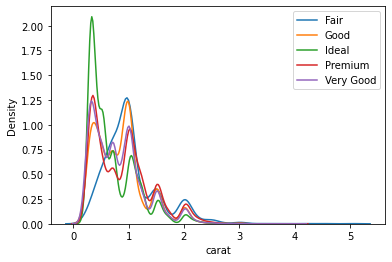

In [13]:
#q.2.d Make density plots on 'carat' against 'cut'.
sns.kdeplot(df['carat'][df['cut'] == 'Fair'], label = 'Fair')
sns.kdeplot(df['carat'][df['cut'] == 'Good'], label = 'Good')
sns.kdeplot(df['carat'][df['cut'] == 'Ideal'], label = 'Ideal')
sns.kdeplot(df['carat'][df['cut'] == 'Premium'], label = 'Premium')
sns.kdeplot(df['carat'][df['cut'] == 'Very Good'], label = 'Very Good')
plt.xlabel('carat')
plt.legend()

<AxesSubplot:xlabel='carat', ylabel='price'>

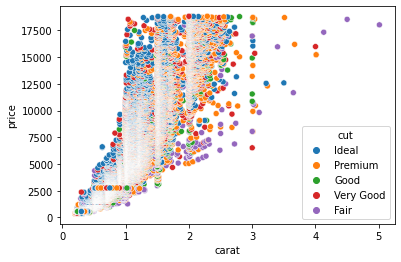

In [22]:
#q.2.e Make scatter plots to show the relationship between 'carat' and 'price'. Mark different 'cut' with separate colors.
sns.scatterplot(data = df,x = 'carat',y = 'price',hue = 'cut')

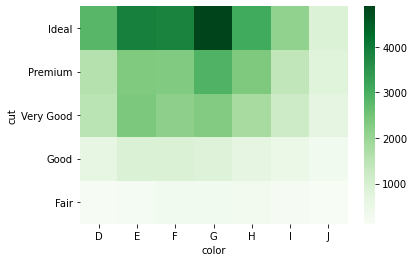

In [15]:
#q.2.f Create a heatmap using 'cut' and 'color' use cmap="Greens".
dx = df.groupby(['cut', 'color']).size().unstack(fill_value = 0)
a = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
dx = dx.reindex(index = a)
ax = sns.heatmap(dx, cmap = 'Greens').invert_yaxis()

<AxesSubplot:xlabel='cut', ylabel='price'>

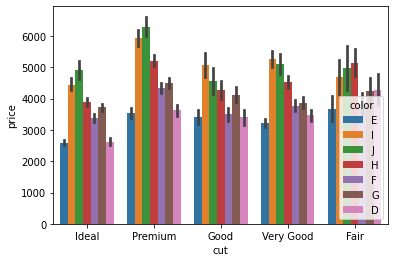

In [16]:
#q.2.g Create a bar plot using 'cut' and 'color'.
sns.barplot(x = 'cut', y = 'price', hue='color', data = df)